<a href="https://colab.research.google.com/github/Salwalabibah/PCVK_Genap_2023/blob/main/week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from google.colab.patches import cv2_imshow

In [3]:
def display(img, cmap='gray'):
  fig = plt.figure(figsize=(12, 10))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')

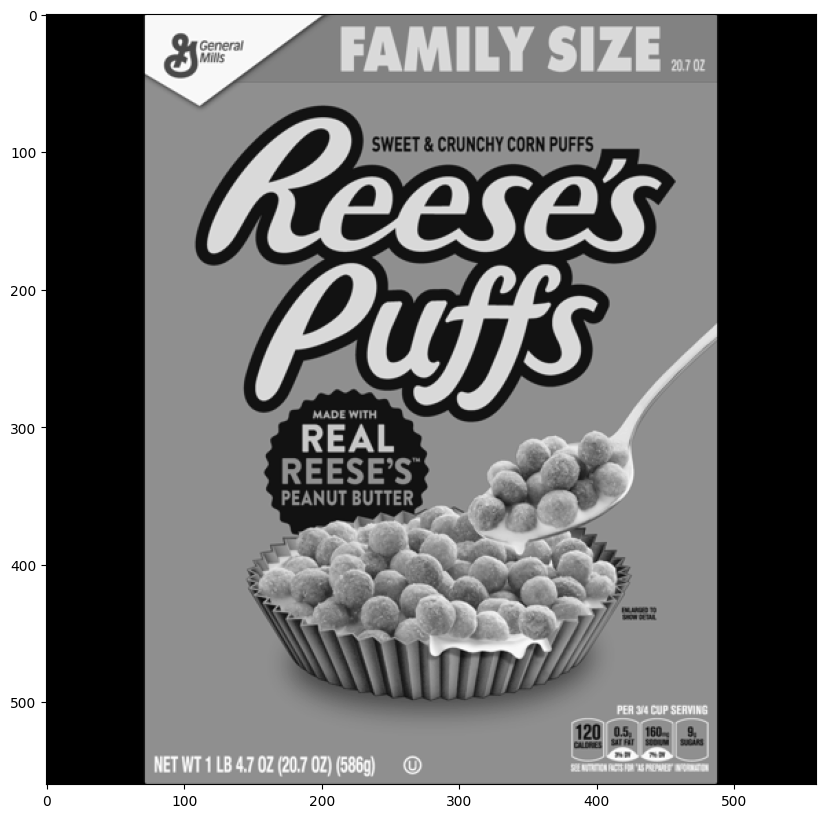

In [4]:
reeses = cv.imread('/content/drive/MyDrive/PCVK/img/facedet/reeses_puffs.png', 0)
display(reeses)

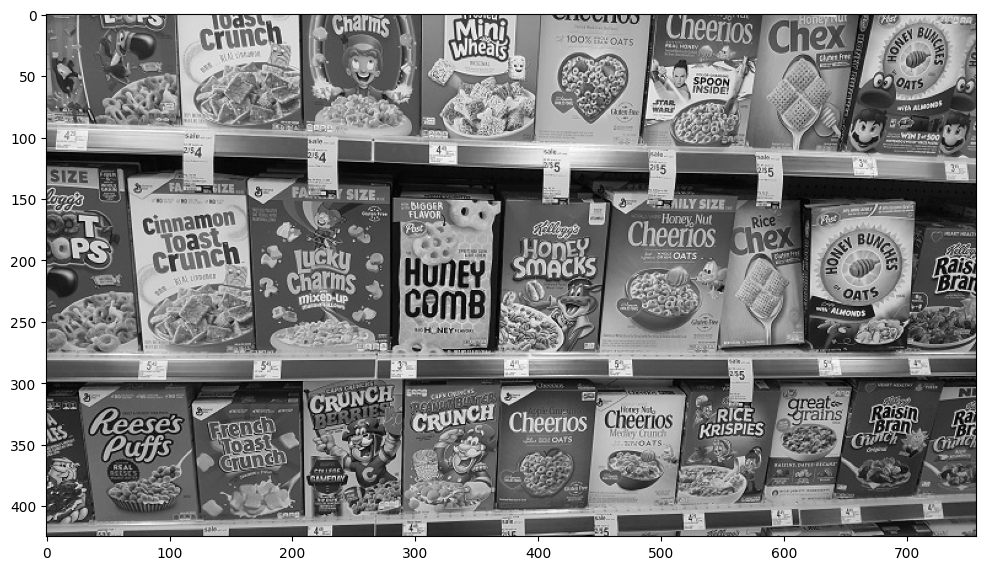

In [5]:
cereals = cv.imread('/content/drive/MyDrive/PCVK/img/facedet/many_cereals.jpg', 0)
display(cereals)

In [6]:
orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
single_match = matches[0]
single_match.distance

71.0

In [7]:
len(matches)

139

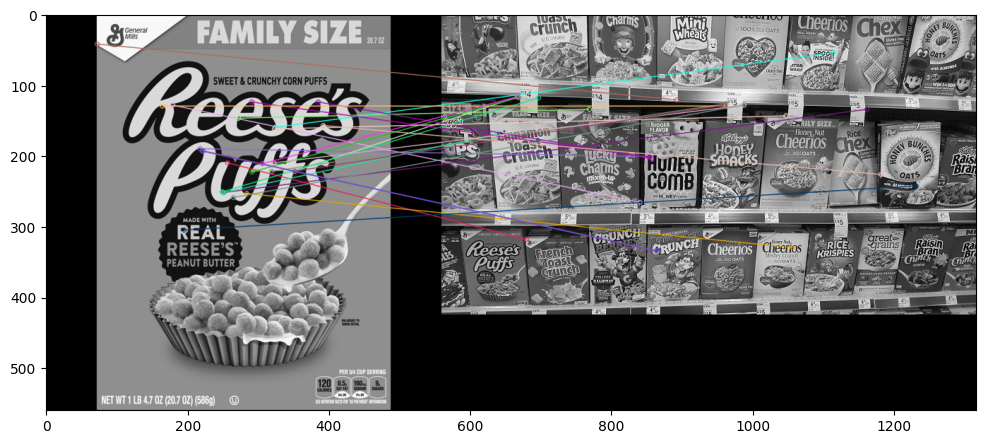

In [8]:
matches = sorted(matches, key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)
display(reeses_match)

In [9]:
sift = cv.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = []

# Makin kecil jarak, makin cocok
# ratio match1 < 75% Match2
for match1, match2 in matches:
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

79

In [10]:
len(matches)

1501

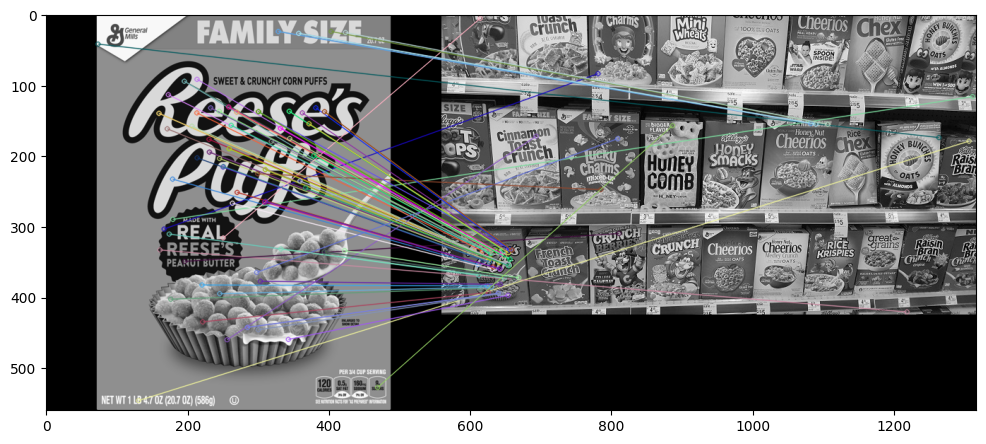

In [11]:
sift_matches = cv.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)
display(sift_matches)

# **Tugas Praktikum**

2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).

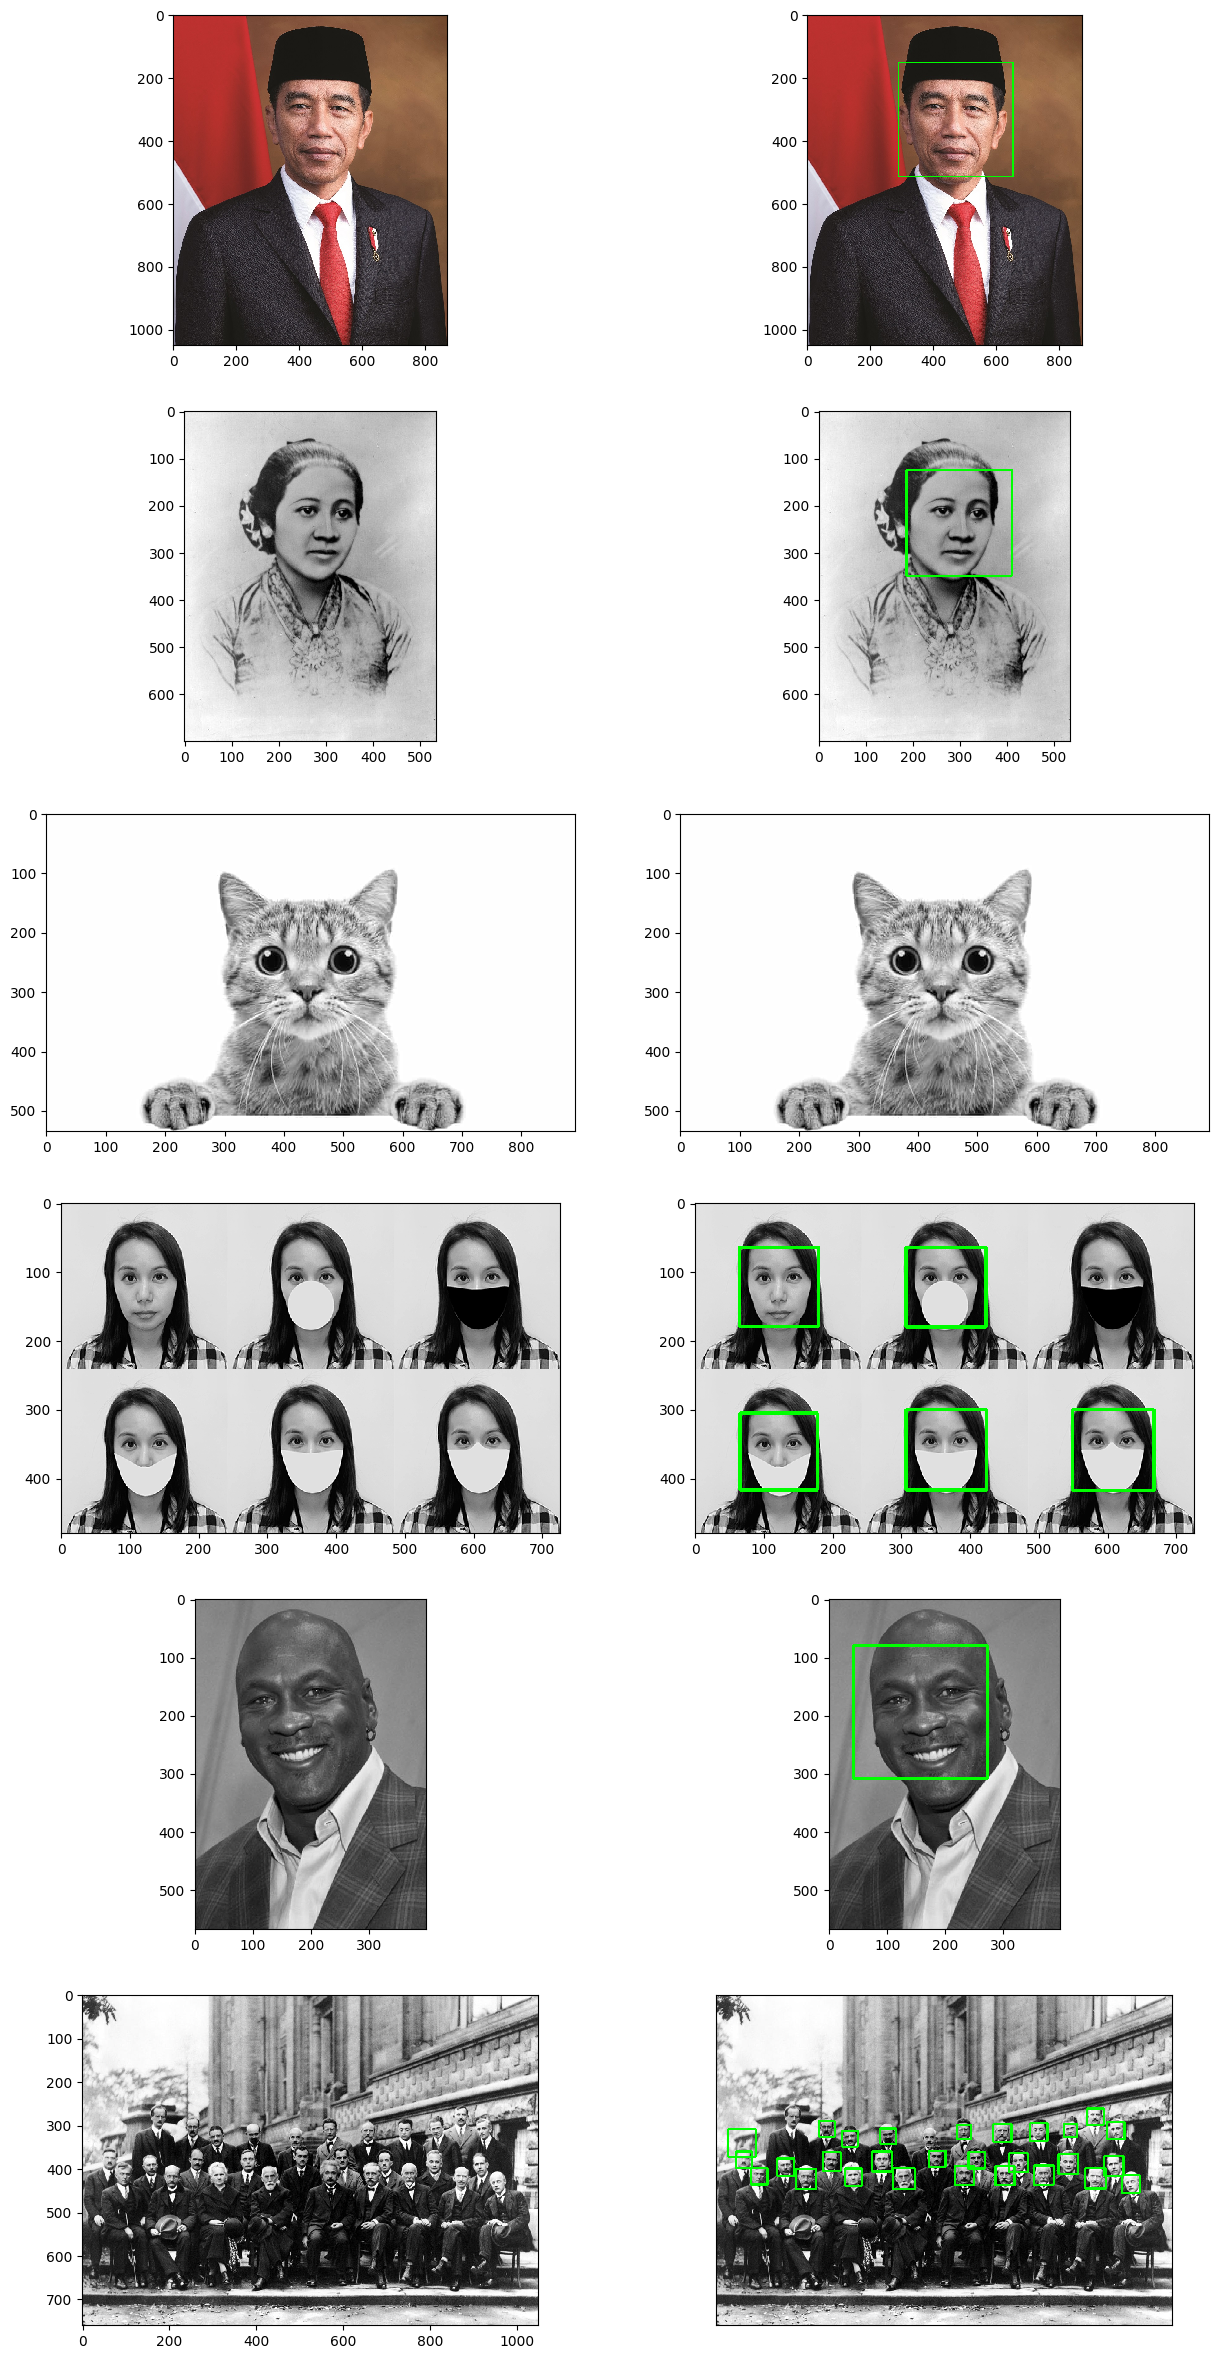

In [12]:
cescade_wajah = cv.CascadeClassifier(
    '/content/drive/MyDrive/PCVK/img/facedet/haarcascades/haarcascade_frontalface_alt.xml')
def facedet(img):
  img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)  # create a grayscale copy
  img_color = img.copy()  # keep the original image in color
  roi_wajah = cescade_wajah.detectMultiScale(img_gray)
  for(x, y, w, h) in roi_wajah:
    cv.rectangle(img_color, (x, y), (x+w, y+h), (0, 255, 0), 3)
  return img_gray, img_color

jokowi = cv.imread('/content/drive/MyDrive/PCVK/img/facedet/jokowi.jpg')
kartini = cv.imread('/content/drive/MyDrive/PCVK/img/facedet/kartini.jpg')
kucing = cv.imread('/content/drive/MyDrive/PCVK/img/facedet/kucing.jpg', 0)
mask = cv.imread('/content/drive/MyDrive/PCVK/img/facedet/mask.png', 0)
mjordan = cv.imread('/content/drive/MyDrive/PCVK/img/facedet/mjordan.jpg', 0)
solvay = cv.imread('/content/drive/MyDrive/PCVK/img/facedet/solvayconf.jpg', 0)

jokowi = cv.cvtColor(jokowi,cv.COLOR_BGR2RGB)
kartini = cv.cvtColor(kartini,cv.COLOR_BGR2RGB)
kucing = cv.cvtColor(kucing,cv.COLOR_BGR2RGB)
mask = cv.cvtColor(mask,cv.COLOR_BGR2RGB)
mjordan = cv.cvtColor(mjordan,cv.COLOR_BGR2RGB)
solvay = cv.cvtColor(solvay,cv.COLOR_BGR2RGB)

hasil1 = facedet(jokowi)
hasil2 = facedet(kartini)
hasil3 = facedet(kucing)
hasil4 = facedet(mask)
hasil5 = facedet(mjordan)
hasil6 = facedet(solvay)

results = [jokowi, hasil1[1], kartini, hasil2[1], kucing, hasil3[1],
           mask, hasil4[1], mjordan, hasil5[1], solvay, hasil6[1]]

plt.figure(figsize = (15,30))
for i in range(len(results)):
  plt.subplot(6,2,i+1),plt.imshow(results[i], interpolation='nearest')
plt.xticks([]),plt.yticks([])
plt.show()


3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah
kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini,
perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada
jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui
search engines.


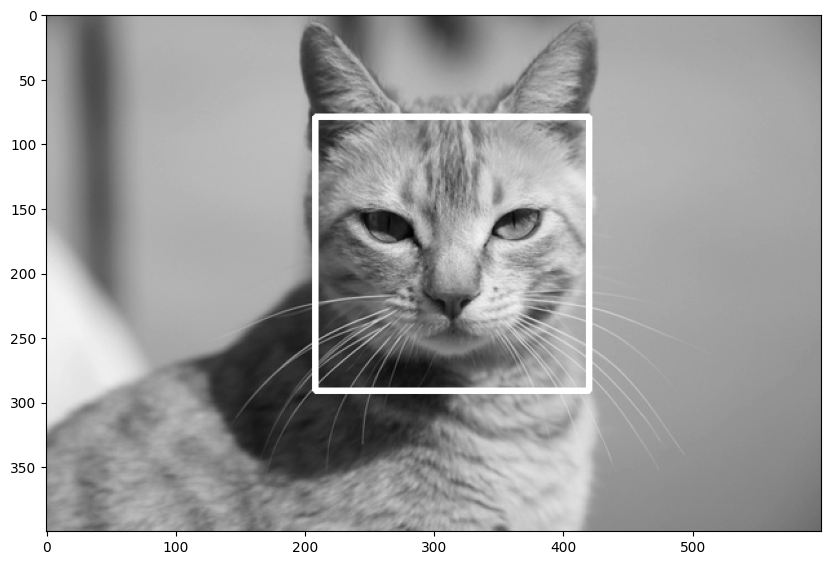

In [13]:
cescade_cat = cv.CascadeClassifier(
    '/content/drive/MyDrive/PCVK/img/facedet/haarcascades/haarcascade_frontalcatface_extended.xml')

kucing = cv.imread('/content/drive/MyDrive/PCVK/img/facedet/mycat.jpg', 0)
roi_wajah = cescade_cat.detectMultiScale(kucing)
for(x, y, w, h) in roi_wajah:
  cv.rectangle(kucing, (x, y), (x+w, y+h), (255, 255, 255), 3)

plt.figure(figsize=(10, 10))
plt.imshow(kucing, cmap='gray')


4. Coba juga untuk eyes detection.

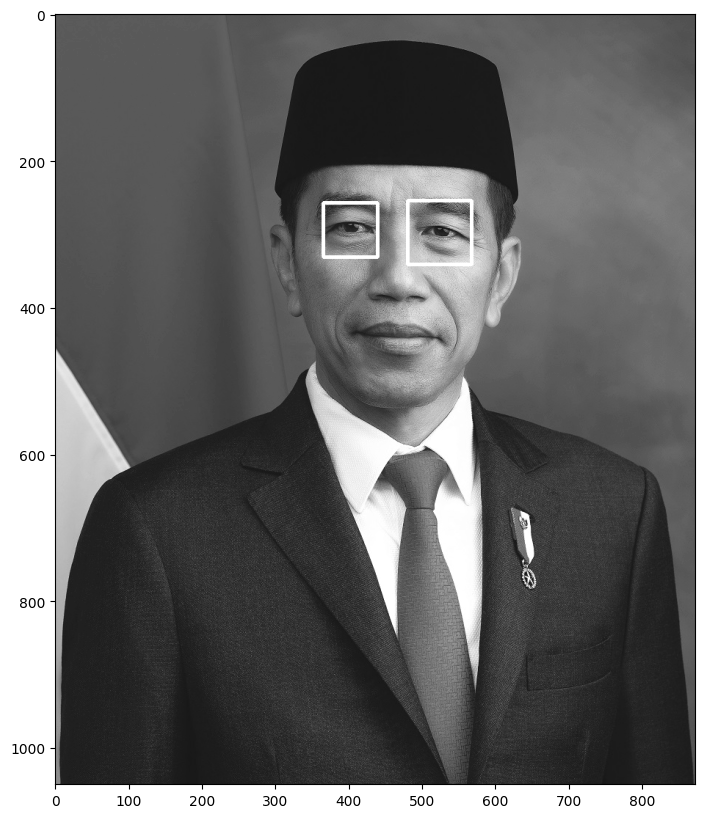

In [14]:
cescade_wajah = cv.CascadeClassifier(
    '/content/drive/MyDrive/PCVK/img/facedet/haarcascades/haarcascade_eye.xml')

jokowi = cv.imread('/content/drive/MyDrive/PCVK/img/facedet/jokowi.jpg', 0)
roi_wajah = cescade_wajah.detectMultiScale(jokowi)
for(x, y, w, h) in roi_wajah:
  cv.rectangle(jokowi, (x, y), (x+w, y+h), (255, 255, 255), 3)

plt.figure(figsize=(10, 10))
plt.imshow(jokowi, cmap='gray')

5. Lakukan Face Tracking menggunakan Google Colab.

In [15]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

In [16]:
def js_to_img(js_reply):
  # decode base64 image
  img_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy arra
  jpg_as_np = np.frombuffer(img_bytes, dtype=np.uint8)
  # decode numppy array into OpenCV BGR Image
  img = cv.imdecode(jpg_as_np, flags=1)
  return img

def bbox_to_bytes(bbox_array):
  # convert array to PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return strinhg
  bbox_bytes ='data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))
  return bbox_bytes


In [17]:
# initialize the Haar Cascade face detection model
face_cascade = cv.CascadeClassifier(cv.samples.findFile(
    cv.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [18]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality){
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video:true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize output
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true)

      // wait from capture
      await new Promise((resolve)=>capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('images/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  img = js_to_img(data)
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  faces = face_cascade.detectMultiScale(gray)
  for(x, y, w, h) in faces:
    img = cv.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
  cv.imwrite(filename, img)

  return filename


<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


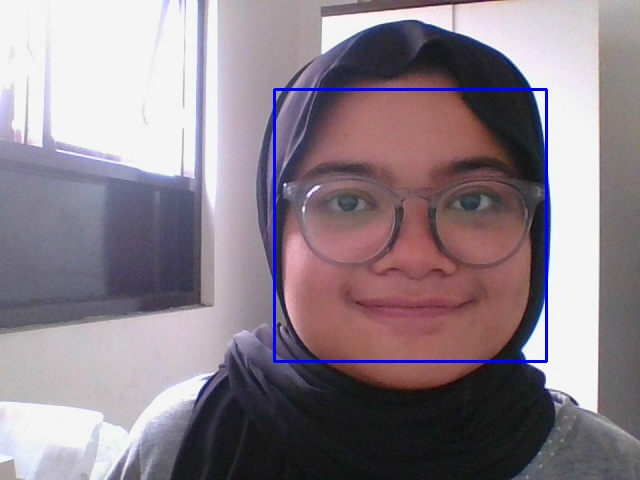

In [26]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

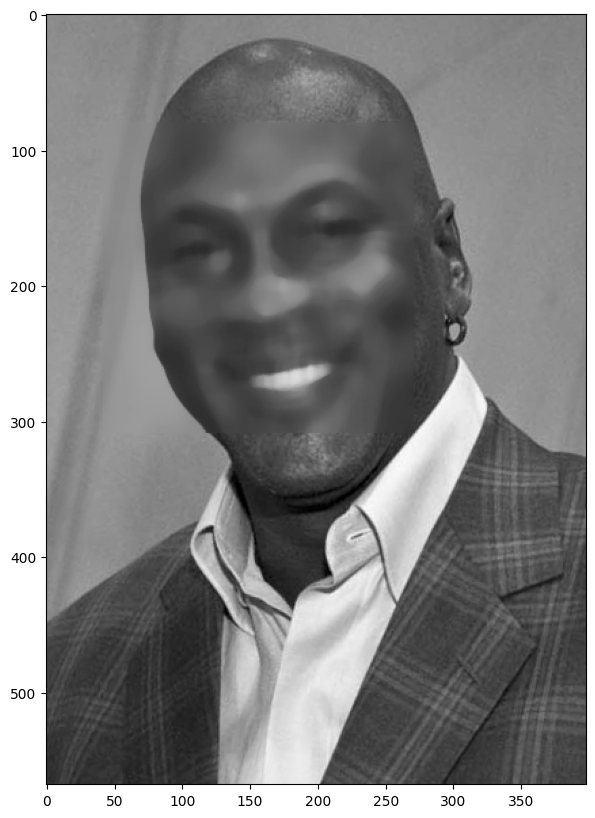

In [20]:
cescade_wajah = cv.CascadeClassifier(
    '/content/drive/MyDrive/PCVK/img/facedet/haarcascades/haarcascade_frontalface_alt.xml')

mjordan = cv.imread('/content/drive/MyDrive/PCVK/img/facedet/mjordan.jpg', 0)
roi_wajah = cescade_wajah.detectMultiScale(mjordan)
for(x, y, w, h) in roi_wajah:
  cp_wajah = mjordan[y:y+h, x:x+w]
  blur_wajah = cv.medianBlur(cp_wajah, 15)
  mjordan[y:y+h, x:x+w] = blur_wajah

plt.figure(figsize=(10, 10))
plt.imshow(mjordan, cmap='gray')

7. Lakukan segmentasi karakter pada KTP seperti gambar berikut

8. Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut

9. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter
Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan
training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa
gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya
gunakan source code di bawah ini untuk proses persiapan untuk training.

In [24]:
import os
import tqdm
import random
import pickle

# Direktori data training
datadir = "dataset/training"
dirs = []

training_data = []
w, h = 100, 100

# Looping direktori data training untuk di ambil nama karakternya
for char_name in sorted(os.listdir(datadir)):
  dirs.append(char_name)

# Looping image data training untuk diubah menjadi array
for char_name in dirs:
  path = os.path.join(datadir, char_name)
  class_numb = dirs.index(char_name)
  for img in tqdm(os.listdir(path)):
    try:
      img_array = cv.imread(os.path.join(data_dir_testing, car, char_name),
                            cv.IMREAD_ANYCOLOR)
      new_array = cv.resize(img_array, (w, h))
      training_data.append([new_array, class_numb])
    except Exception as e:
      pass

random.shuffle(training_data)
X = []
Y = []

for feature, label in training_data:
 X.append(feature)
 Y.append(label)


X = np.array(X).reshape(-1, w, h, 1)

# Tulis ke file pickle
pickle_out = open("X.pickle", "wb")
pickle.dumb(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dumb(Y, pickle_out)
pickle_out.close()

FileNotFoundError: ignored